# Projeto: Séries temporais - MBA

Observações:

1. Para cada questão, crie novas células para efetuar seus códigos. 

2. Nomear variáveis de acordo com o contexto da questão. 

3. Caso necessário, utilize novas caixas de textos para deixar comentários. 

Prof. Jorge Luiz 

jorgearaujo@unifor.br

Você recebeu um dado chamado 'Electric_Production.csv'. Atribua-o a um dataframe df.

In [1]:
import pandas as pd

df=pd.read_csv('Electric_Production.csv')

df

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


## 1. A partir de df, use os modelos abaixo para fazer previsões para os 30 períodos futuros.

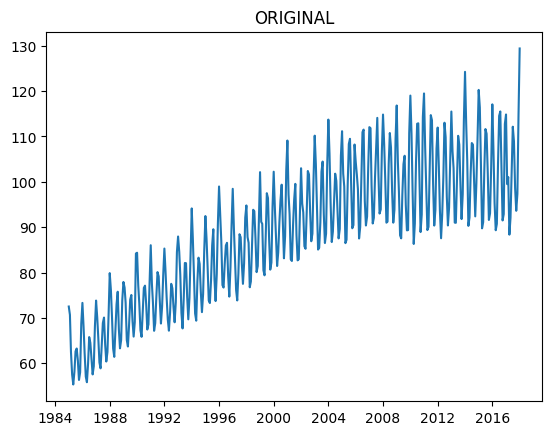

In [17]:
import matplotlib.pyplot as plt

ser=pd.Series(df['IPG2211A2N'].values,index=pd.to_datetime(df['DATE']))

plt.title('ORIGINAL')
plt.plot(ser)

In [25]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


def treinaARIMA(serie, ordem):
    modelo_ar = sm.tsa.arima.ARIMA(serie.values, order=ordem)
    resultado = modelo_ar.fit()
    print('AIC:', resultado.aic)
    return resultado


def getProximaData(serie):
    return serie.index[-1]+pd.DateOffset(months=1)


def previsaoARIMA(modelo, serie, periodos):
    previsao = modelo.predict(start=len(serie), end=len(serie)+periodos-1)
    proximaData = getProximaData(serie)
    datas = pd.date_range(start=proximaData, periods=periodos, freq='ME')
    return pd.Series(previsao, index=datas)


def plotPrevisao(serie, previsao, title='PREVISAO', lableSerie='Original', labelPrevisao='Previsao'):
    plt.title(title)
    plt.plot(serie, label=lableSerie)
    plt.plot(previsao, label=labelPrevisao, linestyle='--')
    plt.legend()
    plt.show()

#### a. ARIMA (2,0,0)

AIC: 2641.8033103564458


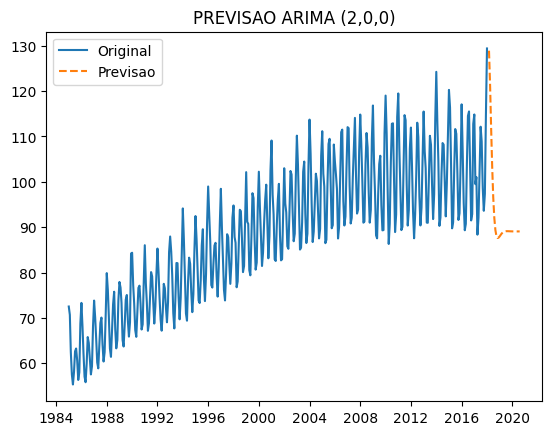

In [31]:
import statsmodels.api as sm

modelo200=treinaARIMA(ser,(2,0,0))
previsao200=previsaoARIMA(modelo200,ser,30)
plotPrevisao(ser,previsao200, title='PREVISAO ARIMA (2,0,0)')

#### b. ARIMA (2,0,1)

AIC: 2582.998069572891


/Users/clairtonluz/projects/personal/MBA-em-ciencia-de-dados/Previsão de Series Temporais/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


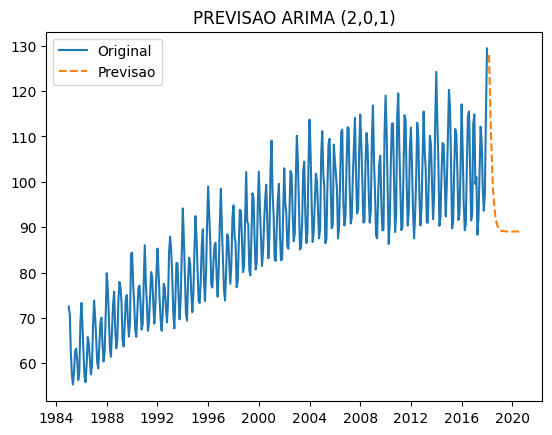

In [32]:
modelo201=treinaARIMA(ser,(2,0,1))
previsao201=previsaoARIMA(modelo201,ser,30)
plotPrevisao(ser,previsao201, title='PREVISAO ARIMA (2,0,1)')

#### c. ARIMA (2,2,1)

/Users/clairtonluz/projects/personal/MBA-em-ciencia-de-dados/Previsão de Series Temporais/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AIC: 2464.3044603158087


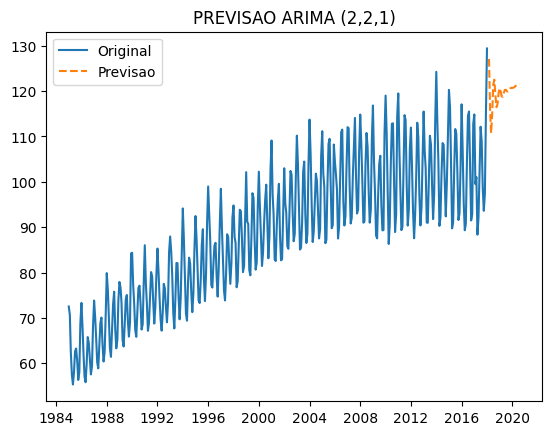

In [33]:
modelo221=treinaARIMA(ser,(2,2,1))
previsao221=previsaoARIMA(modelo221,ser,30)
plotPrevisao(ser,previsao221, title='PREVISAO ARIMA (2,2,1)')

#### d. ARIMA (8,2,1)

/Users/clairtonluz/projects/personal/MBA-em-ciencia-de-dados/Previsão de Series Temporais/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/clairtonluz/projects/personal/MBA-em-ciencia-de-dados/Previsão de Series Temporais/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC: 2199.136104749496


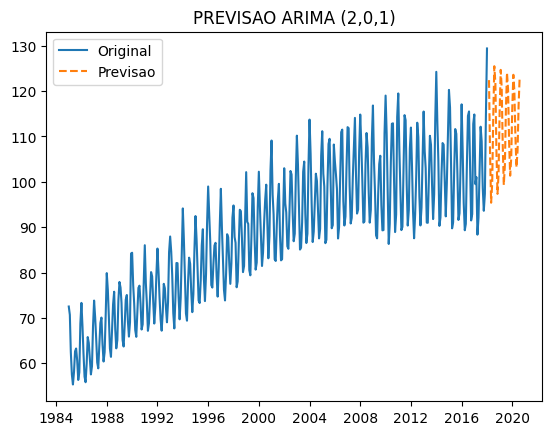

In [34]:
modelo821=treinaARIMA(ser,(8,2,1))
previsao821=previsaoARIMA(modelo821,ser,30)
plotPrevisao(ser,previsao821, title='PREVISAO ARIMA (8,2,1)')

#### e. Criei um gráfico com todas as previsões acima.

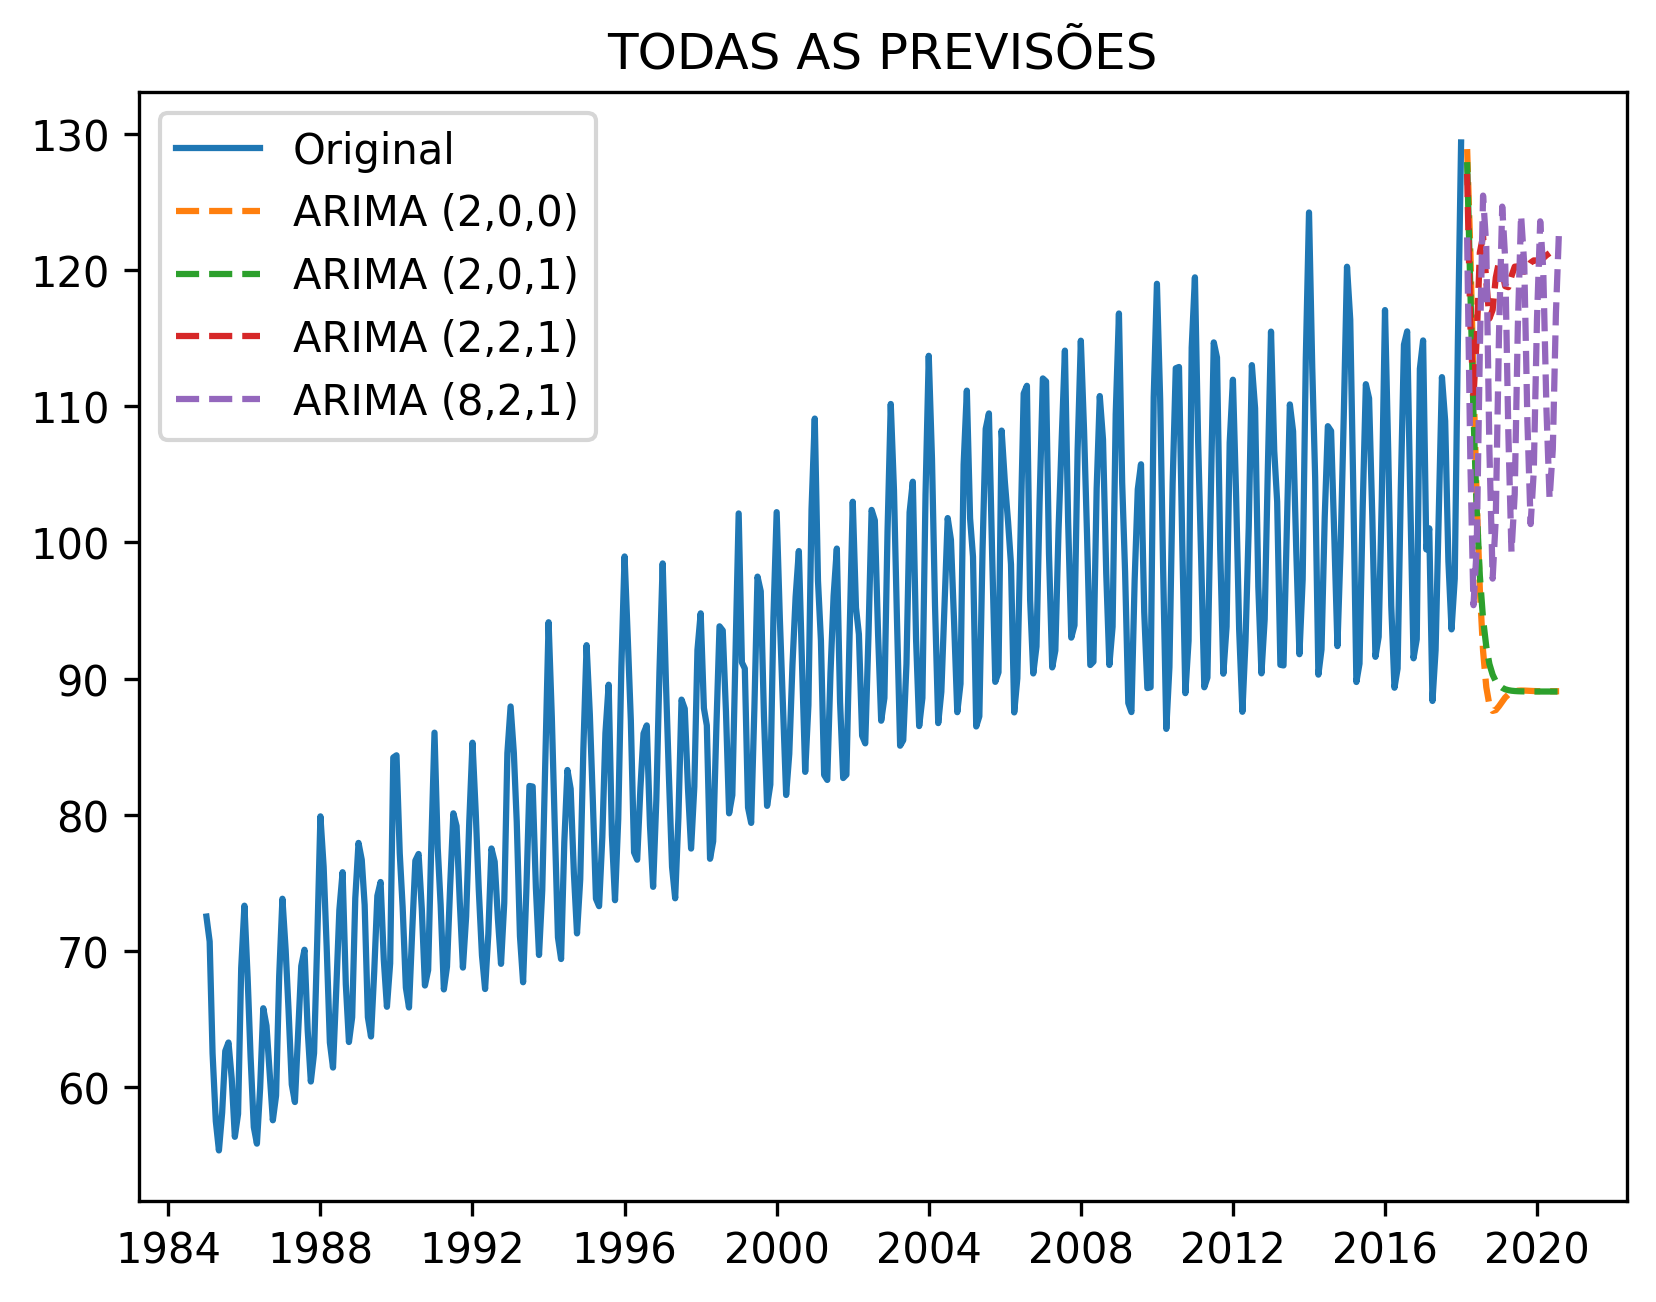

In [41]:
plt.figure(dpi=300)
plt.title("TODAS AS PREVISÕES")
plt.plot(ser, label='Original')
plt.plot(previsao200, label='ARIMA (2,0,0)', linestyle='--')
plt.plot(previsao201, label='ARIMA (2,0,1)', linestyle='--')
plt.plot(previsao221, label='ARIMA (2,2,1)', linestyle='--')
plt.plot(previsao821, label='ARIMA (8,2,1)', linestyle='--')
plt.legend()

plt.show()

#### f. Entre estes, qual é o melhor? Utilize a métrica AIC.

In [52]:
labels = ['ARIMA (2,0,0)', 'ARIMA (2,0,1)', 'ARIMA (2,2,1)', 'ARIMA (8,2,1)']
valores = [modelo200.aic, modelo201.aic, modelo221.aic, modelo821.aic]
lista = list(zip(labels, valores))

lista.sort(key=lambda x: x[1])

print('Ranking dos modelos ARIMA:\n')

for i, (label, valor) in enumerate(lista):
    print(f'{i+1}º lugar:', label, 'AIC:', valor)


print('\nVENCEDOR:', lista[0][0],  'AIC:', lista[0][1])

Ranking dos modelos ARIMA:

1º lugar: ARIMA (8,2,1) AIC: 2199.136104749496
2º lugar: ARIMA (2,2,1) AIC: 2464.3044603158087
3º lugar: ARIMA (2,0,1) AIC: 2582.998069572891
4º lugar: ARIMA (2,0,0) AIC: 2641.8033103564458

VENCEDOR: ARIMA (8,2,1) AIC: 2199.136104749496


#### g. Use o auto-arima e apresente o melhor modelo encontrado. 

In [59]:
# Use o auto-arima e apresente o melhor modelo encontrado.
from pmdarima import auto_arima

modelo_auto = auto_arima(ser, trace=True, stepwise=True, seasonal=False,
                         max_p=12, max_q=2, max_P=12, max_Q=1, star_p=0,
                         star_P=0, star_Q=0, m=12)

modelo_auto_treinado = modelo_auto.fit(ser)

/Users/clairtonluz/projects/personal/MBA-em-ciencia-de-dados/Previsão de Series Temporais/.venv/lib/python3.11/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2750.050, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2691.759, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2624.463, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2748.185, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2625.508, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2525.516, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2493.118, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2235.015, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2463.436, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2219.925, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2300.788, Time=0.05 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2214.195, Time=0.13 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2214.112, Time=0.11 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : 

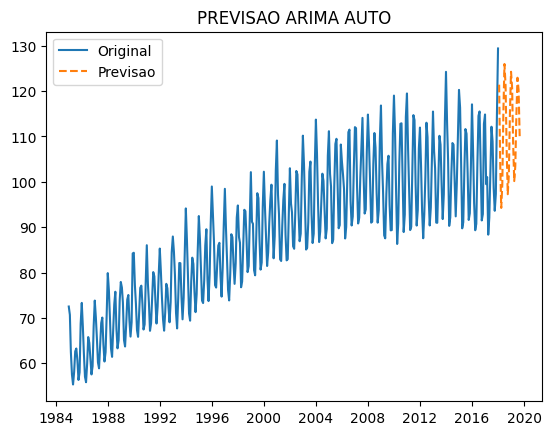

In [64]:
previsao_auto=modelo_auto_treinado.predict(n_periods=20)
plotPrevisao(ser,previsao_auto, title='PREVISAO ARIMA AUTO')


#### h. Compare os modelos ARIMA com qualquer implementação de um modelo ML. 